In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib notebook

# Simple two-layer, linear perceptron

We are going to implement a simple, linear perceptron with a linear activation function and train it using backpropagation.

Weights are initialized with random numbers of mean 0 and then update iteratively using the error between network output and wanted labels. 

Initially, we are going to test very simple input-output relationships with the input consisting of a 2-dimensional vector with either 0 or 1, and the output consisting of a 1-dimensional target-value also with either 0 or 1.

Iteration 0: error = 1.000000
Iteration 10: error = 1.000000
Iteration 20: error = 0.000000
Iteration 30: error = 0.000000
Iteration 40: error = 0.000000
Iteration 50: error = 0.000000
Iteration 60: error = 0.000000
Iteration 70: error = 0.000000
Iteration 80: error = 0.000000
Iteration 90: error = 0.000000

output after training is:
 [[False]
 [ True]
 [ True]
 [ True]]

weights after training are:
 [[0.00404401]
 [0.44064899]]


<IPython.core.display.Javascript object>


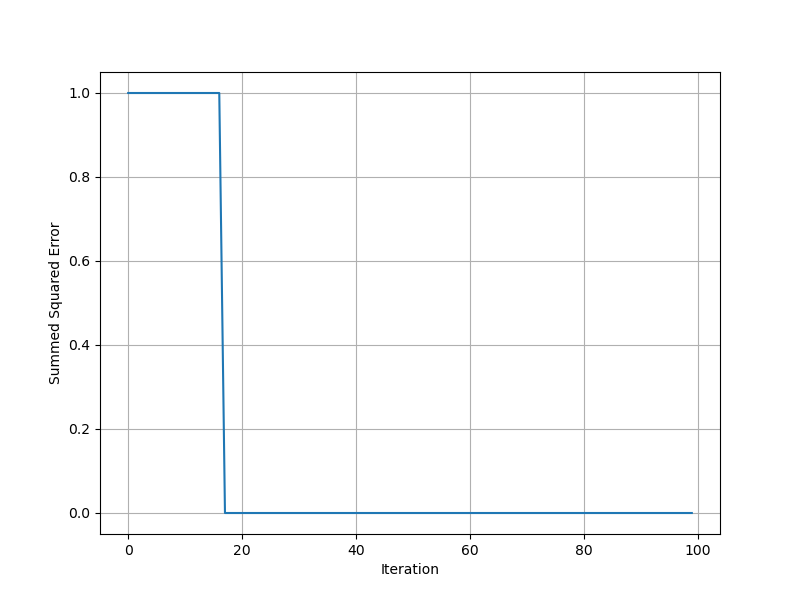

In [2]:
# a linear activation function
def step(x):
    return (x>0)

# implements a simple two-layer network
def twoLayer(X,y,plotting=True):
    # seed random numbers to get repeatable results
    np.random.seed(1)

    # initialize weights randomly (mean 0)
    # the number of weights is determined by the number
    # of columns in both the input data X and the output
    # data y!
    syn0 = 2*np.random.random((X.shape[1],y.shape[1])) - 1

    # maximum iteration
    maxIter = 100

    # store errors
    l1ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = step(np.dot(l0,syn0))

        # evaluate the error of the layer
        l1Error = y - l1

        # evaluate the summed squared error
        l1ErrorArray[it] = np.sum(l1Error*l1Error)

        # print out the summed squared error sometimes
        if (it%10==0):
            print("Iteration {:d}: error = {:f}\r".format(it,l1ErrorArray[it]))

        # the error determines the amount we need
        # to move 
        l1Delta = l1Error

        # the weight update is the dot product between
        # the pattern input and the correction amount 
        # times the learning rate
        lr = 0.01
        syn0 += lr*np.dot(l0.T,l1Delta)

    print("\noutput after training is:\n",l1)
    print("\nweights after training are:\n",syn0)
    if (plotting):
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(l1ErrorArray)
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return(syn0,l1ErrorArray)
    
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0],
                [1,1],
                [1,0],
                [0,1] ])
    
# this is the target state we want to have, 
# our input is two numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[0],
              [1],
              [1],
              [1]])

# let's call our function and do the training
(weights,errors)=twoLayer(X,y)

That worked nicely. Let's try another set of simple target values for y. 

Iteration 0: error = 4.000000
Iteration 10: error = 4.000000
Iteration 20: error = 3.000000
Iteration 30: error = 3.000000
Iteration 40: error = 1.000000
Iteration 50: error = 1.000000
Iteration 60: error = 1.000000
Iteration 70: error = 1.000000
Iteration 80: error = 1.000000
Iteration 90: error = 1.000000

output after training is:
 [[False]
 [False]
 [ True]
 [False]]

weights after training are:
 [[ 0.00404401]
 [-0.00935101]]


<IPython.core.display.Javascript object>


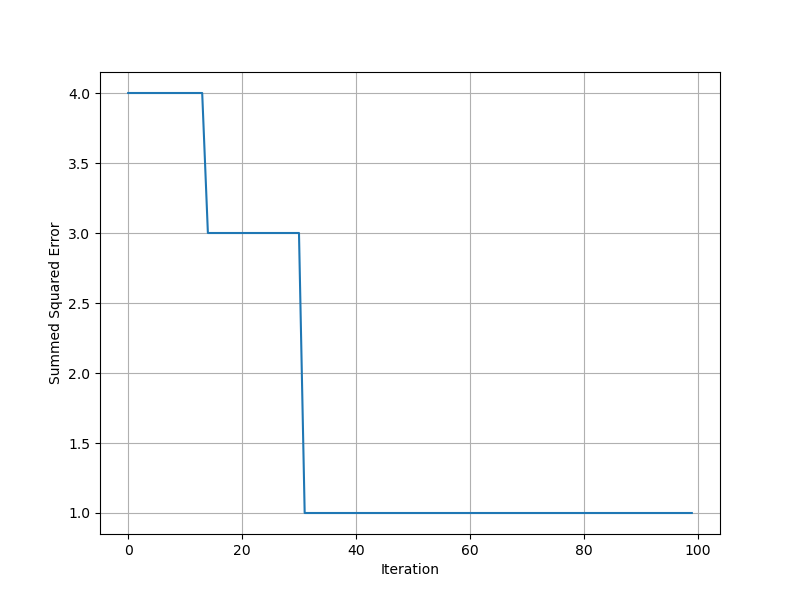

In [3]:
y = np.array([[1],
              [0],
              [1],
              [0]])

# let's call our function and do the training
(weights,errors)=twoLayer(X,y)

Wait, that did not work at all - in fact, we have a large error, even though we have some sort of learning.

But we forgot something! Right now, what we can do is to change the linear weights in our perceptron. But we have no way to shift the whole curve!! This is what the "bias" neuron can do.

To see why this is important, imagine we are trying to fit a line by only having weights:

$ y = w*x$

This can of course only change the slope of the line. But we also need to shift the line, so we need an intercept or bias:

$ y = w*x + b$


Let's add this neuron to our two-layer network:

In [4]:
# implements a simple two-layer network
def twoLayerBias(X,y,plotting=True):
    # seed random numbers to get repeatable results
    np.random.seed(2)

    # let's add ones to the data to model the bias
    X=np.hstack((np.ones((X.shape[0],1)),X))
    
    # initialize weights randomly (mean 0)
    # the number of weights is determined by the number
    # of columns in both the input data X and the output
    # data y!
    syn0 = 2*np.random.random((X.shape[1],y.shape[1])) - 1
    print(syn0)
    # maximum iteration
    maxIter = 100

    # store errors
    l1ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = step(np.dot(l0,syn0))
        
        # evaluate the error of the layer
        l1Error = y - l1
        
        # evaluate the summed squared error
        l1ErrorArray[it] = np.sum(l1Error*l1Error)

        # print out the summed squared error sometimes
        if (it%10==0):
            print("Iteration {:d}: error = {:f}\r".format(it,l1ErrorArray[it]))

        # the error determines the amount we need
        # to move along the derivative
        l1Delta = l1Error

        # the weight update is the dot product between
        # the pattern input and the correction amount 
        # times the learning rate
        lr = 0.1
        syn0 += lr*np.dot(l0.T,l1Delta)

    print("output after training is:\n",l1)
    print("\nweights after training are:\n",syn0)
    if (plotting):
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(l1ErrorArray)
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return(syn0,l1ErrorArray)

[[-0.1280102 ]
 [-0.94814754]
 [ 0.09932496]]
Iteration 0: error = 2.000000
Iteration 10: error = 0.000000
Iteration 20: error = 0.000000
Iteration 30: error = 0.000000
Iteration 40: error = 0.000000
Iteration 50: error = 0.000000
Iteration 60: error = 0.000000
Iteration 70: error = 0.000000
Iteration 80: error = 0.000000
Iteration 90: error = 0.000000
output after training is:
 [[ True]
 [False]
 [ True]
 [False]]

weights after training are:
 [[ 0.2719898 ]
 [-0.24814754]
 [-0.30067504]]


<IPython.core.display.Javascript object>


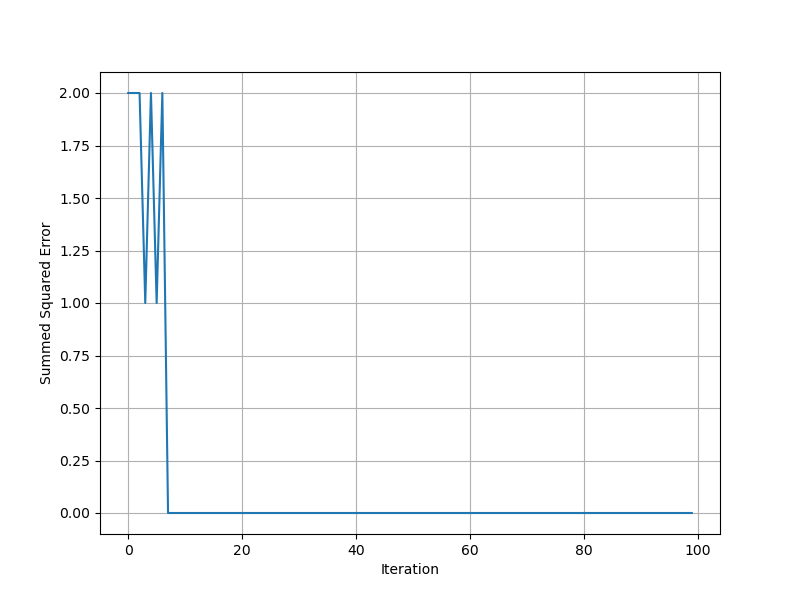

In [9]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0],
                [1,1],
                [1,0],
                [0,1] ])
    
y = np.array([[1],
              [0],
              [1],
              [0]])

# let's call our function and do the training
(weights,errors)=twoLayerBias(X,y)

Right, so now the curve can shift "up and down", because we can change the bias as well...

The y-labels we wanted the network to learn are actually logical combinations like ```AND``` or ```OR```, so let's make that explicit.

[[0]
 [1]
 [0]
 [0]]
[[-0.1280102 ]
 [-0.94814754]
 [ 0.09932496]]
Iteration 0: error = 1.000000
Iteration 10: error = 1.000000
Iteration 20: error = 0.000000
Iteration 30: error = 0.000000
Iteration 40: error = 0.000000
Iteration 50: error = 0.000000
Iteration 60: error = 0.000000
Iteration 70: error = 0.000000
Iteration 80: error = 0.000000
Iteration 90: error = 0.000000
output after training is:
 [[False]
 [ True]
 [False]
 [False]]

weights after training are:
 [[-0.2280102 ]
 [ 0.15185246]
 [ 0.19932496]]


<IPython.core.display.Javascript object>


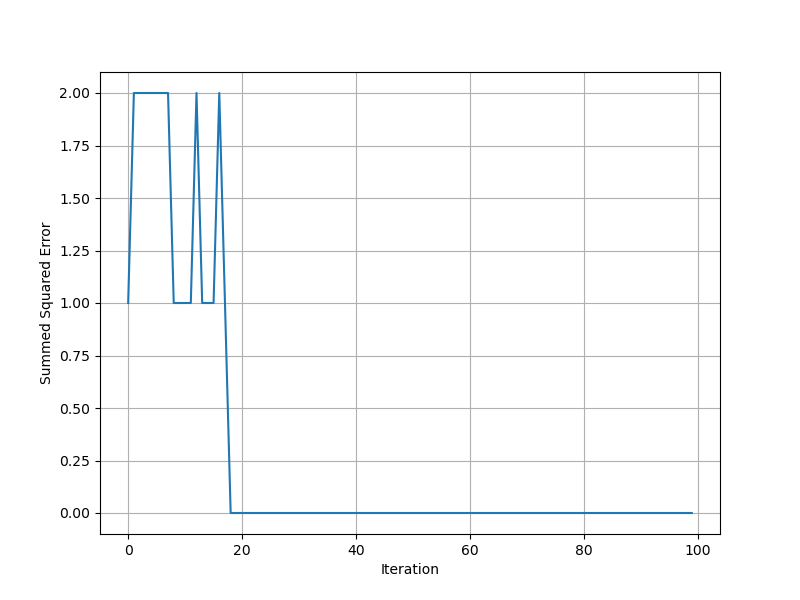

In [5]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0],
                [1,1],
                [1,0],
                [0,1] ])
    
y = np.logical_and(X[:,0],X[:,1]).reshape(-1,1).astype(int)
print(y)
# let's call our function and do the training
(weights,errors)=twoLayerBias(X,y)

# Simple two-layer, non-linear perceptron

We are going to implement a simple, perceptron with a *non-linear sigmoid activation function* and train it using backpropagation.

Weights are initialized with random numbers of mean 0 and then updated iteratively using the error between network output and wanted labels. 

Initially, we are going to test very simple input-output relationships with the input consisting of a 3-dimensional vector with either 0 or 1, and the output consisting of a 1-dimensional target-value also with either 0 or 1.

In [6]:
# activation function
def sigmoid(x):
    return(1./(1+np.exp(-x)))

# derivative of the activation function
# here, it comes in handy that for the sigmoid, it's derivative
# is very easily formed
def dsigmoid(x):
    return(x*(1-x))

def twoLayerBias(X,y,lr=0.5,plotting=True):
    # seed random numbers to get repeatable results
    np.random.seed(1)
    
    # let's add ones to the data to model the bias
    X=np.hstack((np.ones((X.shape[0],1)),X))
    # initialize weights randomly (mean 0)
    # the number of weights is determined by the number
    # of columns in both the input data X (but remember we
    # have the bias). We still connect of course to the 
    # output dimensions determined by the data y 
    syn0 = 2*np.random.random((X.shape[1],y.shape[1])) - 1

    # maximum iteration
    maxIter = 5000

    # store errors
    l1ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = sigmoid(np.dot(l0,syn0))

        # evaluate the error of the layer
        l1Error = y - l1

        # evaluate the summed squared error
        l1ErrorArray[it] = np.sum(l1Error*l1Error)

        # print out the summed squared error sometimes
        if (it%100==0):
            print("Iteration {:d}: error = {:f}".format(it,l1ErrorArray[it]))

        # the error determines the amount we need
        # to move along the derivative
        l1Delta = l1Error * dsigmoid(l1)

        # the weight update is the dot product between
        # the pattern input and the correction amount times
        # the learning rate
        syn0 += lr*np.dot(l0.T,l1Delta)

    print("output after training is:\n",l1)
    print("\nweights after training are:\n",syn0)
    if (plotting):
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(l1ErrorArray)
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return(syn0,l1ErrorArray)


[False  True  True  True  True  True False False]
Iteration 0: error = 2.571811
Iteration 100: error = 0.346620
Iteration 200: error = 0.212974
Iteration 300: error = 0.151458
Iteration 400: error = 0.115971
Iteration 500: error = 0.093132
Iteration 600: error = 0.077350
Iteration 700: error = 0.065873
Iteration 800: error = 0.057193
Iteration 900: error = 0.050425
Iteration 1000: error = 0.045015
Iteration 1100: error = 0.040600
Iteration 1200: error = 0.036936
Iteration 1300: error = 0.033851
Iteration 1400: error = 0.031220
Iteration 1500: error = 0.028951
Iteration 1600: error = 0.026978
Iteration 1700: error = 0.025246
Iteration 1800: error = 0.023714
Iteration 1900: error = 0.022351
Iteration 2000: error = 0.021131
Iteration 2100: error = 0.020032
Iteration 2200: error = 0.019038
Iteration 2300: error = 0.018135
Iteration 2400: error = 0.017311
Iteration 2500: error = 0.016556
Iteration 2600: error = 0.015862
Iteration 2700: error = 0.015222
Iteration 2800: error = 0.014630
Itera

<IPython.core.display.Javascript object>


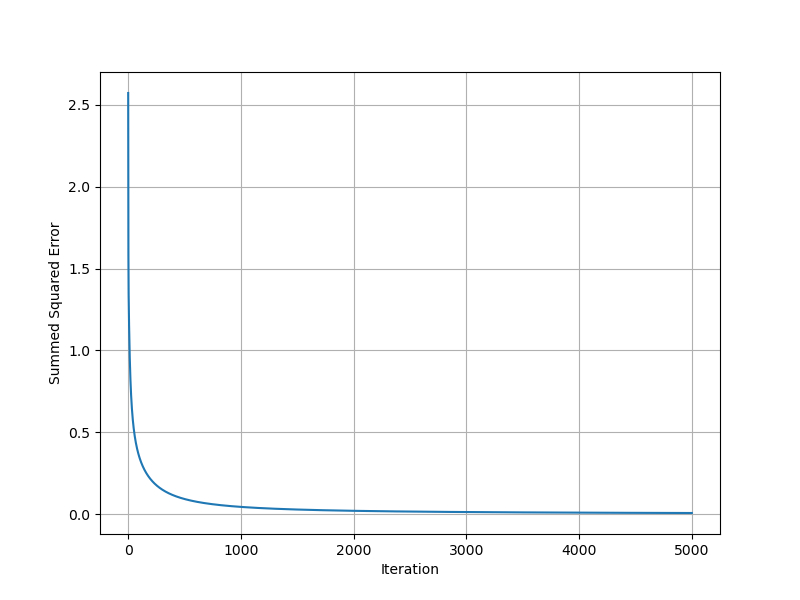

[[-8.977404 ]
 [12.4382988]
 [ 5.9487146]
 [ 5.9487146]]


In [12]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1],
                [1,0,0],
                [1,1,0],
                [0,1,0],
                [0,0,0]])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is a simple, logical combination:
y = np.logical_or(X[:,0],np.logical_and(X[:,1],X[:,2]))
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

Cool, that works.

So let's try something very different. Let's go back to a very standard IRIS dataset, which contains measurements of different iris-flowers and their corresponding labels that group the flowers into different types.

We want to categorize this data using our two-layer network:

In [7]:
print(np.column_stack((X,y)))

[[0 0 0]
 [1 1 1]
 [1 0 0]
 [0 1 0]]


<IPython.core.display.Javascript object>


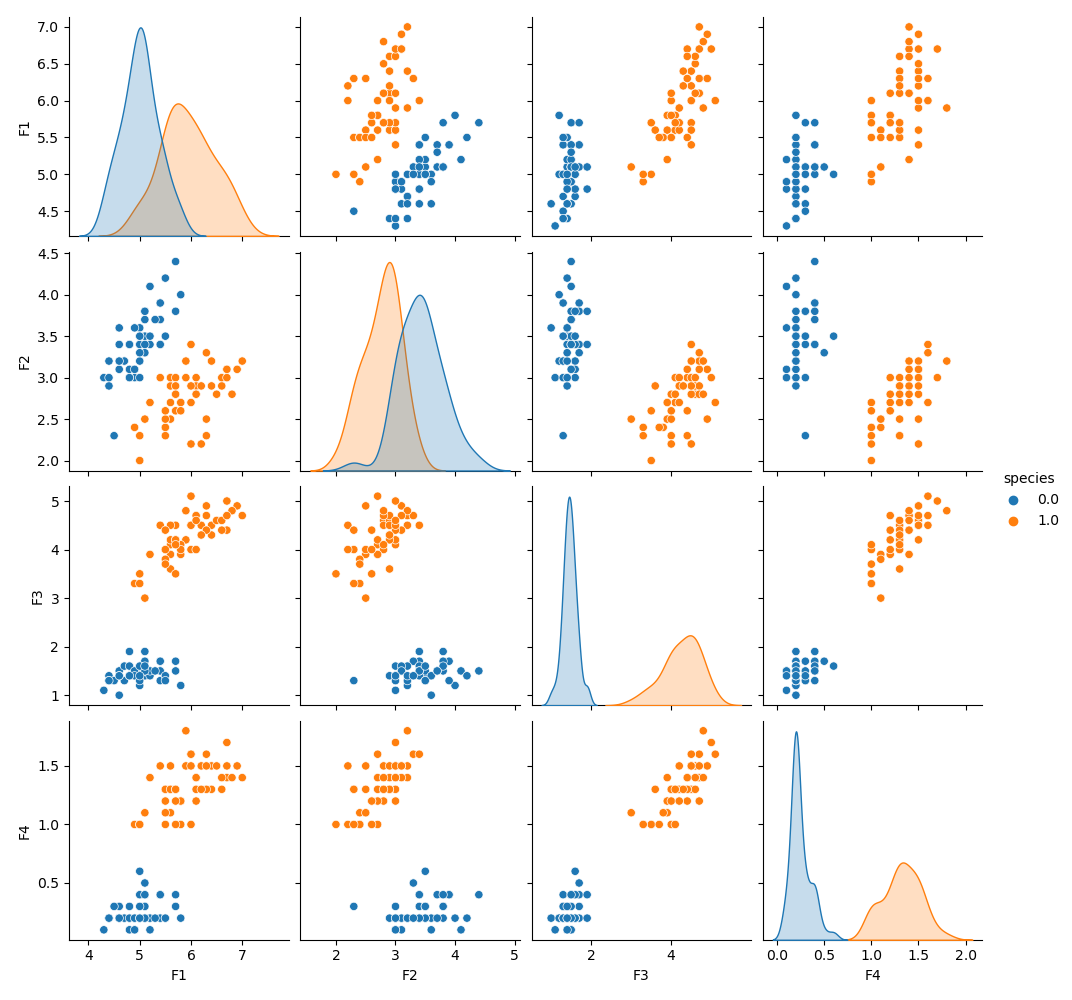

<IPython.core.display.Javascript object>


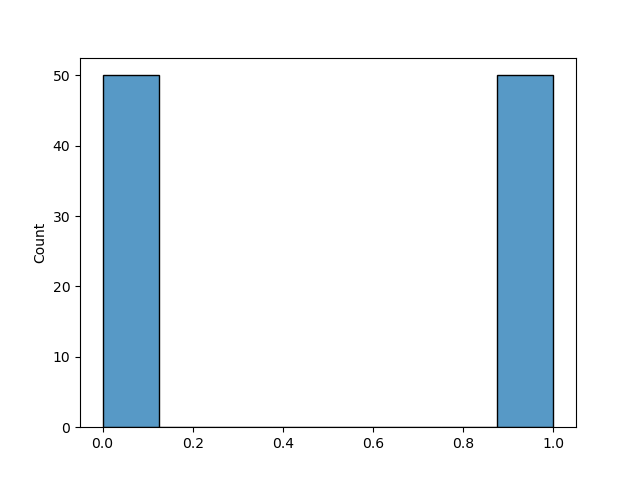

In [8]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data[:100]
# this is the target state we want to have
y = iris.target[:100]

# let's plot the full statistics of this using pairplot
sb.pairplot(pd.DataFrame(np.column_stack((X,y)),
                         columns=['F1','F2','F3','F4','species']),
           hue='species')
plt.show()

# this is the histogram of labels
plt.figure()
sb.histplot(y)
plt.show()

As we can see, this should be an easy task for our neural network. The two types of classes present in this data can be separated easily along one of the dimensions even with a linear cut...

Iteration 0: error = 45.381880
Iteration 100: error = 50.000000
Iteration 200: error = 50.000000
Iteration 300: error = 50.000000
Iteration 400: error = 50.000000
Iteration 500: error = 50.000000
Iteration 600: error = 50.000000
Iteration 700: error = 50.000000
Iteration 800: error = 50.000000
Iteration 900: error = 50.000000
Iteration 1000: error = 50.000000
Iteration 1100: error = 50.000000
Iteration 1200: error = 50.000000
Iteration 1300: error = 50.000000
Iteration 1400: error = 50.000000
Iteration 1500: error = 50.000000
Iteration 1600: error = 50.000000
Iteration 1700: error = 50.000000
Iteration 1800: error = 50.000000
Iteration 1900: error = 50.000000
Iteration 2000: error = 50.000000
Iteration 2100: error = 50.000000
Iteration 2200: error = 50.000000
Iteration 2300: error = 50.000000
Iteration 2400: error = 50.000000
Iteration 2500: error = 50.000000
Iteration 2600: error = 50.000000
Iteration 2700: error = 50.000000
Iteration 2800: error = 50.000000
Iteration 2900: error = 50

<IPython.core.display.Javascript object>


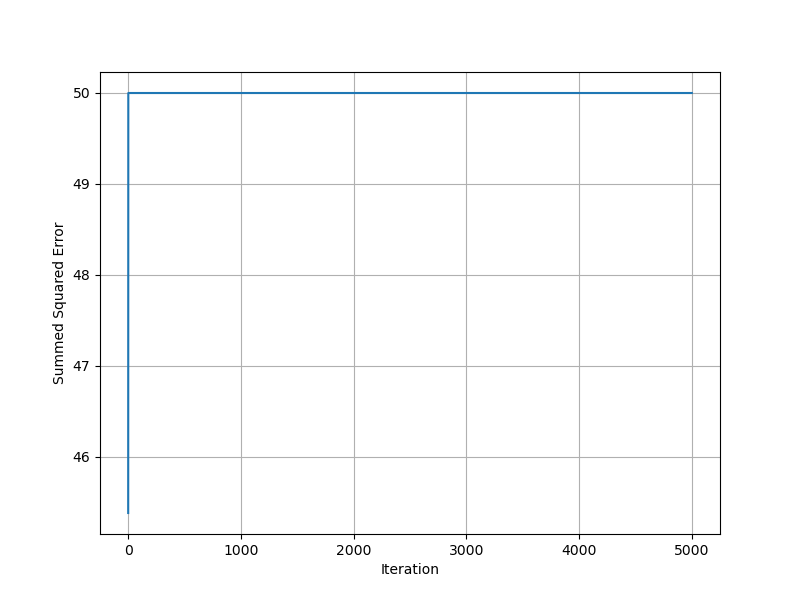

In [9]:
# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))

Ugh. That did not go so well. Somehow, the network did not learn. Instead the error goes pretty much immediately to high values. What went wrong?

The problem is in the input values or in the learning rate. Remember that we are doing gradient descent, so when we use the gradient for updating the weights, the gradient can become too big and the network "overshoots" and cannot find the correct minimum. 

There are two solutions:

* normalize the data: `X = (X-X.mean(axis=0))/X.std(axis=0)`
* change the learning rate

Let's try the first one:

Iteration 0: error = 28.820631
Iteration 100: error = 0.000090
Iteration 200: error = 0.000087
Iteration 300: error = 0.000084
Iteration 400: error = 0.000081
Iteration 500: error = 0.000079
Iteration 600: error = 0.000077
Iteration 700: error = 0.000074
Iteration 800: error = 0.000072
Iteration 900: error = 0.000070
Iteration 1000: error = 0.000068
Iteration 1100: error = 0.000067
Iteration 1200: error = 0.000065
Iteration 1300: error = 0.000063
Iteration 1400: error = 0.000062
Iteration 1500: error = 0.000060
Iteration 1600: error = 0.000059
Iteration 1700: error = 0.000058
Iteration 1800: error = 0.000056
Iteration 1900: error = 0.000055
Iteration 2000: error = 0.000054
Iteration 2100: error = 0.000053
Iteration 2200: error = 0.000052
Iteration 2300: error = 0.000051
Iteration 2400: error = 0.000050
Iteration 2500: error = 0.000049
Iteration 2600: error = 0.000048
Iteration 2700: error = 0.000047
Iteration 2800: error = 0.000046
Iteration 2900: error = 0.000046
Iteration 3000: error

<IPython.core.display.Javascript object>


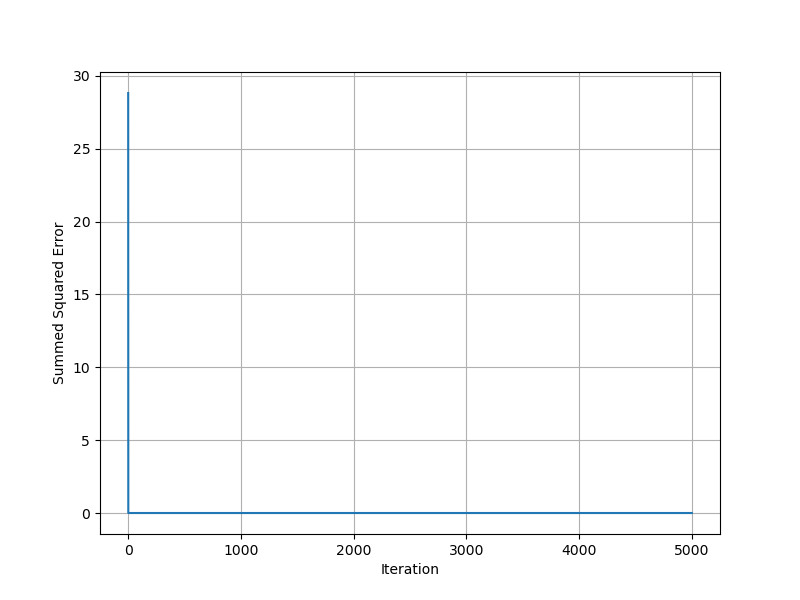

In [10]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data[:100]
    
# normalize the data
X = (X-X.mean(axis=0))/X.std(axis=0)

# this is the target state we want to have
y = iris.target[:100]

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))

That seemed to have done the trick.

Let's try the second one without normalizing the data:

Iteration 0: error = 45.381880
Iteration 100: error = 0.494145
Iteration 200: error = 0.258578
Iteration 300: error = 0.177749
Iteration 400: error = 0.136468
Iteration 500: error = 0.111261
Iteration 600: error = 0.094199
Iteration 700: error = 0.081848
Iteration 800: error = 0.072474
Iteration 900: error = 0.065105
Iteration 1000: error = 0.059151
Iteration 1100: error = 0.054236
Iteration 1200: error = 0.050106
Iteration 1300: error = 0.046584
Iteration 1400: error = 0.043544
Iteration 1500: error = 0.040891
Iteration 1600: error = 0.038555
Iteration 1700: error = 0.036482
Iteration 1800: error = 0.034629
Iteration 1900: error = 0.032962
Iteration 2000: error = 0.031454
Iteration 2100: error = 0.030083
Iteration 2200: error = 0.028831
Iteration 2300: error = 0.027683
Iteration 2400: error = 0.026626
Iteration 2500: error = 0.025649
Iteration 2600: error = 0.024745
Iteration 2700: error = 0.023904
Iteration 2800: error = 0.023120
Iteration 2900: error = 0.022388
Iteration 3000: error

<IPython.core.display.Javascript object>


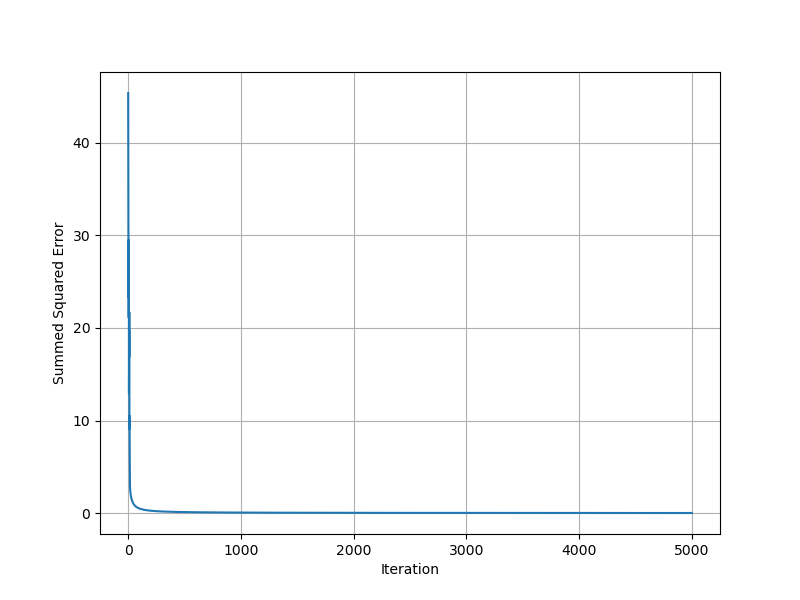

In [11]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data[:100]
    
# this is the target state we want to have
y = iris.target[:100]

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1),.01)

And that works as well!

**Remember: gradient descent needs proper step-sizes!**

## Breaking the neural network

Let's return to our simple, 0/1 example and try a different training/testing combination:

Iteration 0: error = 1.224950
Iteration 100: error = 1.019479
Iteration 200: error = 1.006310
Iteration 300: error = 1.001896
Iteration 400: error = 1.000558
Iteration 500: error = 1.000164
Iteration 600: error = 1.000048
Iteration 700: error = 1.000014
Iteration 800: error = 1.000004
Iteration 900: error = 1.000001
Iteration 1000: error = 1.000000
Iteration 1100: error = 1.000000
Iteration 1200: error = 1.000000
Iteration 1300: error = 1.000000
Iteration 1400: error = 1.000000
Iteration 1500: error = 1.000000
Iteration 1600: error = 1.000000
Iteration 1700: error = 1.000000
Iteration 1800: error = 1.000000
Iteration 1900: error = 1.000000
Iteration 2000: error = 1.000000
Iteration 2100: error = 1.000000
Iteration 2200: error = 1.000000
Iteration 2300: error = 1.000000
Iteration 2400: error = 1.000000
Iteration 2500: error = 1.000000
Iteration 2600: error = 1.000000
Iteration 2700: error = 1.000000
Iteration 2800: error = 1.000000
Iteration 2900: error = 1.000000
Iteration 3000: error 

<IPython.core.display.Javascript object>


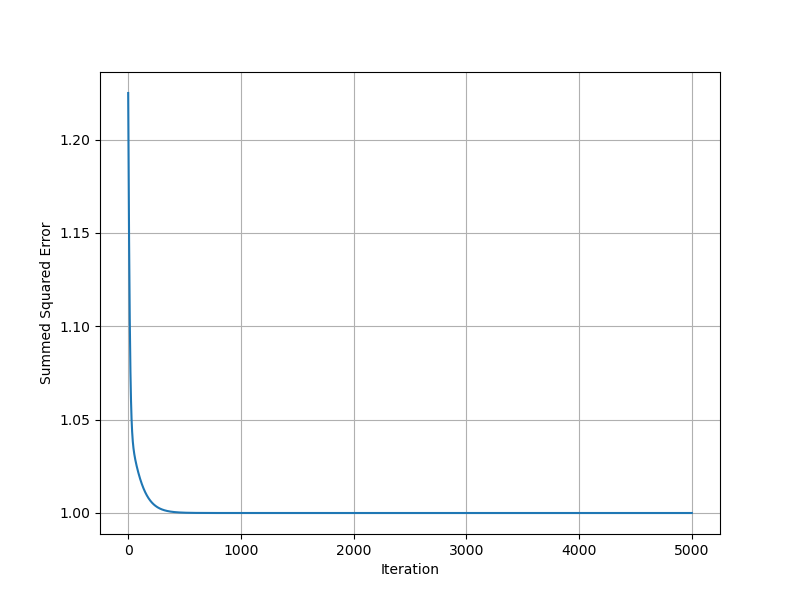

In [12]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[1],
              [1],
              [0],
              [0]])

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y,.1)

Ouch. So that does not work. We have left the realm of simple correlations and the output space is a weird, highly non-linear combination of the inputs.

But this is a sigmoid-network, so can our network even learn non-linear things?

[-2.5  1.  -1.5  0. ]
Iteration 0: error = 12.677320
Iteration 100: error = 9.519133
Iteration 200: error = 9.509640
Iteration 300: error = 9.506449
Iteration 400: error = 9.504847
Iteration 500: error = 9.503883
Iteration 600: error = 9.503240
Iteration 700: error = 9.502779
Iteration 800: error = 9.502434
Iteration 900: error = 9.502164
Iteration 1000: error = 9.501949
Iteration 1100: error = 9.501773
Iteration 1200: error = 9.501626
Iteration 1300: error = 9.501501
Iteration 1400: error = 9.501394
Iteration 1500: error = 9.501302
Iteration 1600: error = 9.501221
Iteration 1700: error = 9.501149
Iteration 1800: error = 9.501086
Iteration 1900: error = 9.501029
Iteration 2000: error = 9.500977
Iteration 2100: error = 9.500931
Iteration 2200: error = 9.500889
Iteration 2300: error = 9.500850
Iteration 2400: error = 9.500815
Iteration 2500: error = 9.500783
Iteration 2600: error = 9.500753
Iteration 2700: error = 9.500725
Iteration 2800: error = 9.500699
Iteration 2900: error = 9.500675

<IPython.core.display.Javascript object>


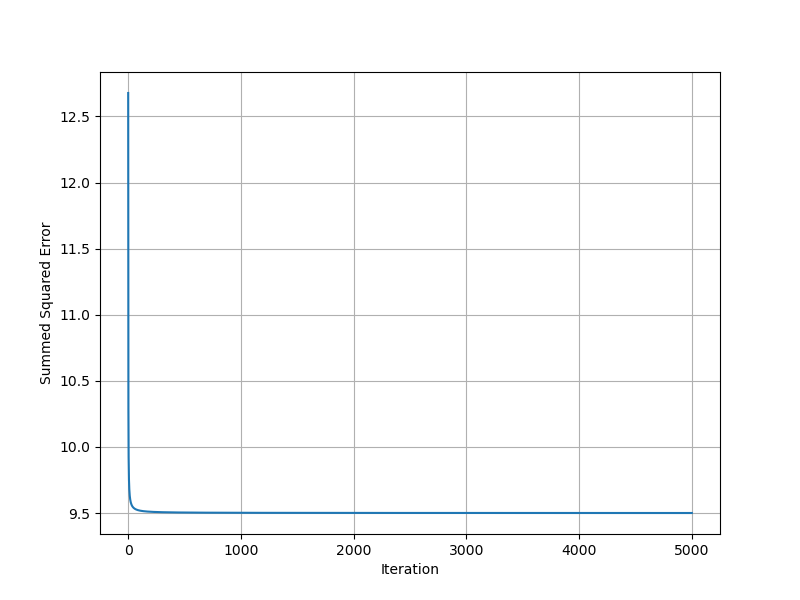

[[-4.69392929]
 [-0.69028359]
 [-0.49270979]
 [-4.92330816]]


In [13]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is an explictly non-linear function:
y = (X[:,0]+(X[:,1]-X[:,2])/(X[:,1]+0.4))
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

Apparently not. But wait!

If we look at the "y" target values, we can see that they are well outside the 0,1 range of the network inputs. Since the activation function itself is normalized between 0 and 1, we of course should normalize our output to be between 0 and 1:

[-2.5  1.  -1.5  0. ]
[0.         1.         0.28571429 0.71428571]
Iteration 0: error = 1.026935
Iteration 100: error = 0.041590
Iteration 200: error = 0.017848
Iteration 300: error = 0.011171
Iteration 400: error = 0.008059
Iteration 500: error = 0.006276
Iteration 600: error = 0.005126
Iteration 700: error = 0.004325
Iteration 800: error = 0.003736
Iteration 900: error = 0.003286
Iteration 1000: error = 0.002931
Iteration 1100: error = 0.002645
Iteration 1200: error = 0.002408
Iteration 1300: error = 0.002210
Iteration 1400: error = 0.002041
Iteration 1500: error = 0.001896
Iteration 1600: error = 0.001770
Iteration 1700: error = 0.001659
Iteration 1800: error = 0.001562
Iteration 1900: error = 0.001475
Iteration 2000: error = 0.001397
Iteration 2100: error = 0.001326
Iteration 2200: error = 0.001263
Iteration 2300: error = 0.001205
Iteration 2400: error = 0.001152
Iteration 2500: error = 0.001104
Iteration 2600: error = 0.001059
Iteration 2700: error = 0.001018
Iteration 2800: erro

<IPython.core.display.Javascript object>


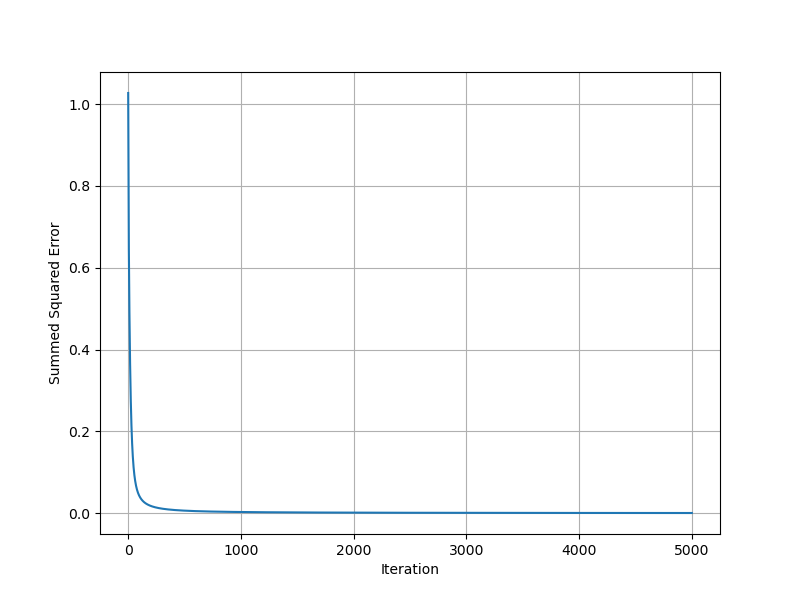

[[-1.93284957]
 [ 3.1800377 ]
 [ 5.01262122]
 [-2.16222843]]


In [14]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is an explictly non-linear function:
y = (X[:,0]+(X[:,1]-X[:,2])/(X[:,1]+0.4))
print(y)
y = (y-y.min())/(y.max()-y.min())
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

But, still, the example from above cannot apparently be learned. This is because even though we have non-linear activation, the target vectors are far outside the "span" of the input examples.

The solution? 

More layers!

## Three-layer network

Let's add a "hidden" layer to our network. We also add a bias node to the input layer of the network in order to be able to shift the outputs around.

In [15]:
def threeLayerBias(X,y,numHidden=5,lr=0.02,plotting=True):

    # seed random numbers to get repeatable results
    np.random.seed(1)

    # let's add ones to the data to model the bias
    X=np.hstack((np.ones((X.shape[0],1)),X))
    
    # initialize weights randomly (mean 0)
    syn0 = 2*np.random.random((X.shape[1],numHidden)) - 1
    syn1 = 2*np.random.random((numHidden,y.shape[1])) - 1

    # maximum iteration
    maxIter = 40000

    # store errors
    l2ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = sigmoid(np.dot(l0,syn0))
        l2 = sigmoid(np.dot(l1,syn1))

        # evaluate the error of the layer
        l2Error = y - l2

        l2ErrorArray[it] = np.sum(l2Error*l2Error)

        if (it%1000==0):
            sys.stdout.write("Iteration {:d}: error = {:f}\r".format(it,l2ErrorArray[it]))
            sys.stdout.flush()

        # the error determines the amount we need
        # to move along the derivative
        # to "regularize" this further, we multiply by the 
        # learning rate alpha

        l2Delta = l2Error*dsigmoid(l2)
        l1Delta = l2Delta.dot(syn1.T)*dsigmoid(l1)

        # the weight update is the dot product between
        # the pattern input and the correction amount
        # moderated by the learning rate lr
        syn1 += lr*np.dot(l1.T,l2Delta)
        syn0 += lr*np.dot(X.T,l1Delta)

    print("\noutput after training is:\n",l2)
    print("\nweights of layer1 after training are:\n",syn1)
    print("\nweights of layer0 after training are:\n",syn0)
    if (plotting):
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(l2ErrorArray)
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return(syn1,l2ErrorArray,l2)

Iteration 39000: error = 0.000107
output after training is:
 [[0.99404109]
 [0.99548644]
 [0.00442954]
 [0.0053155 ]]

weights of layer1 after training are:
 [[-10.67871284]
 [  6.55503652]
 [-11.94739351]]

weights of layer0 after training are:
 [[-1.68593589  1.49201377 -2.32216887]
 [ 5.88507709 -1.50698741 -9.48702761]
 [-9.36488843  0.70342989  6.52128069]
 [-1.44234643  0.88975381 -0.95195862]]


<IPython.core.display.Javascript object>


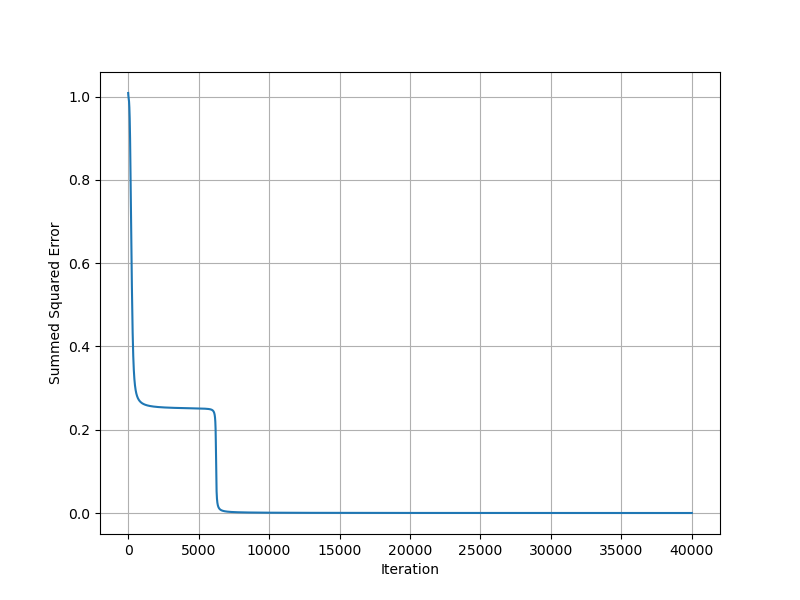

In [24]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[1],
              [1],
              [0],
              [0]])

# let's call our function and do the training:
(weights,errors,_)=threeLayerBias(X,y,3,1)

Alright, now this one works. You can also clearly see the location, where the optimization kicked in to do another round.

Iteration 39000: error = 0.003131
output after training is:
 [[7.07938662e-09]
 [1.30843941e-06]
 [7.10009642e-08]
 [4.24434304e-07]
 [5.28748466e-09]
 [4.47319878e-09]
 [1.53429456e-08]
 [1.30525853e-08]
 [3.39973749e-06]
 [2.51581285e-07]
 [4.88061218e-09]
 [1.47148416e-08]
 [7.77162859e-07]
 [4.34519770e-07]
 [4.84191526e-09]
 [4.79016573e-09]
 [4.26360922e-09]
 [8.23334597e-09]
 [5.08127662e-09]
 [4.37216018e-09]
 [1.71381809e-08]
 [5.19014192e-09]
 [4.63318424e-09]
 [2.36956513e-07]
 [2.20871896e-08]
 [2.11231071e-06]
 [2.86679342e-08]
 [7.60857032e-09]
 [1.17688595e-08]
 [1.33023717e-07]
 [5.34315887e-07]
 [2.54716392e-08]
 [4.24068034e-09]
 [4.54778702e-09]
 [4.27914320e-07]
 [5.68912470e-08]
 [6.95224730e-09]
 [4.94149184e-09]
 [1.01100476e-06]
 [1.30751514e-08]
 [7.61826041e-09]
 [3.57577724e-03]
 [7.38628361e-08]
 [2.33543245e-08]
 [4.93786186e-09]
 [2.16448795e-06]
 [4.35519049e-09]
 [8.79121883e-08]
 [4.79996493e-09]
 [2.66416279e-08]
 [4.96995445e-01]
 [5.02343249e-01]
 [5

<IPython.core.display.Javascript object>


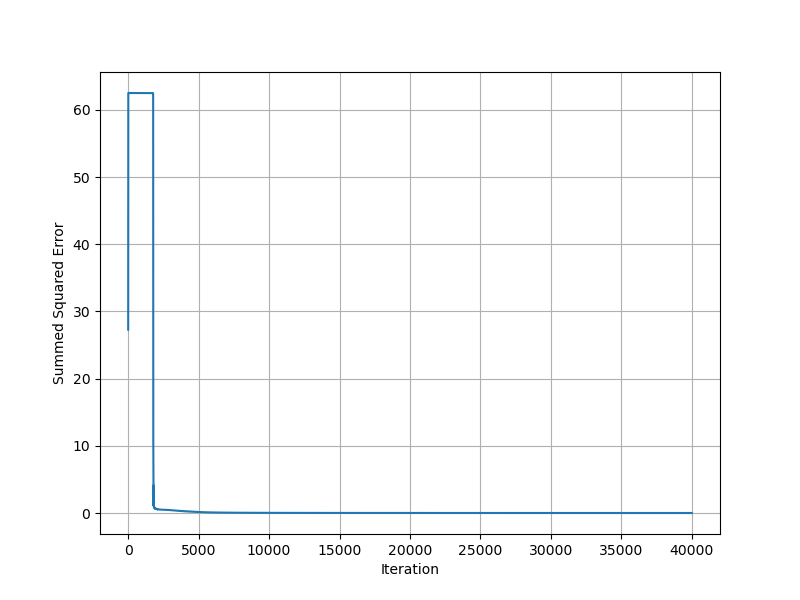

[[-5.88834113]
 [ 2.49598412]
 [ 2.11696655]
 [-3.96787349]
 [ 3.00482904]
 [-7.78932123]
 [-1.85596129]
 [15.66270962]
 [ 0.52418834]
 [-5.77083191]
 [13.30157364]]


<IPython.core.display.Javascript object>


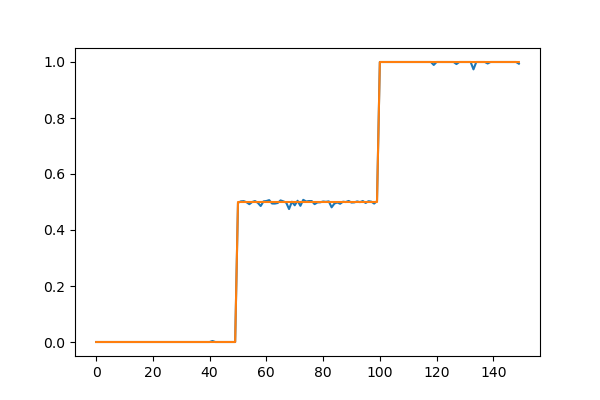

In [16]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data
X = (X-X.mean(axis=0))/X.std(axis=0)    
# this is the target state we want to have
y = iris.target/2

# let's call our function and do the training:
(weights,errors,pred)=threeLayerBias(X,y.reshape(-1,1),11,1)
print(weights)
fig,ax = plt.subplots(figsize=(6,4))
plt.plot(pred)
plt.plot(y)